In [17]:
from PyLayouts import Layout, Draw
import numpy as np 

In [24]:
shape = (3,4,2)
stride = (1,3,12)

In [25]:

##we we think about it, we have some thing of the size [0,24)
#chunk 1 is [0,3) 
#chunk 2 is [0, 12) - [0,3) which is [3, 12) (as sets) 
#chunk 3 = [12, 24) 

chunk_1 = [i for i in range(0,3)]
chunk_2 = [i for i in range(3,12)]
chunk_3 = [i for i in range(12,24)]

chunks = [chunk_1, chunk_2, chunk_3]

perms = [(0,1,2), (0,2,1), (1,0,2), (1,2,0), (2,0,1), (2,1,0)]

N_perms = 6 
fin_layouts = {}
pre_isomorphisms = {}
for p in perms: 
  x,y,z = p 
  s_perm = (shape[x], shape[y], shape[z]) 
  d_perm = (stride[x], stride[y], stride[z])
  L = Layout(s_perm, d_perm)
  L.realize()
  fin_layouts[p] = L.realized_layout
  iso = np.array(chunks[x] + chunks[y] + chunks[z])
  pre_isomorphisms[p] = iso
  
  





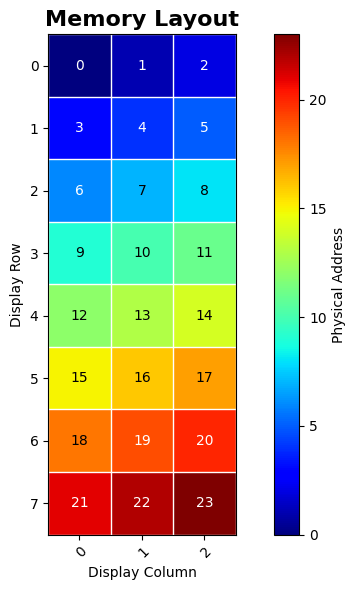

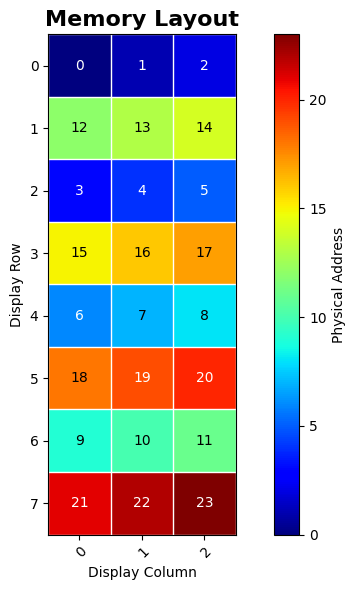

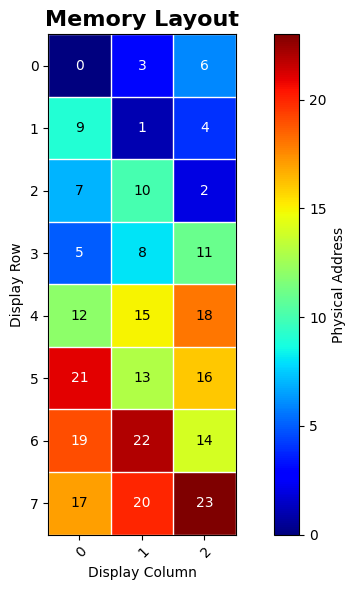

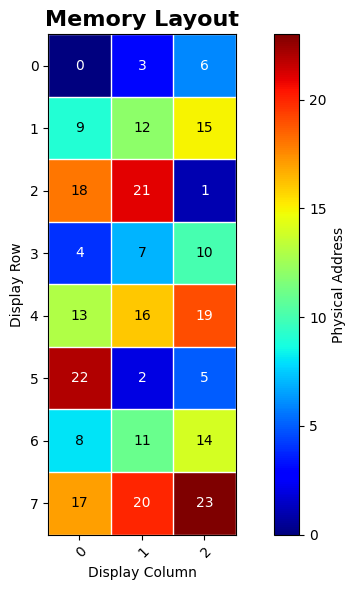

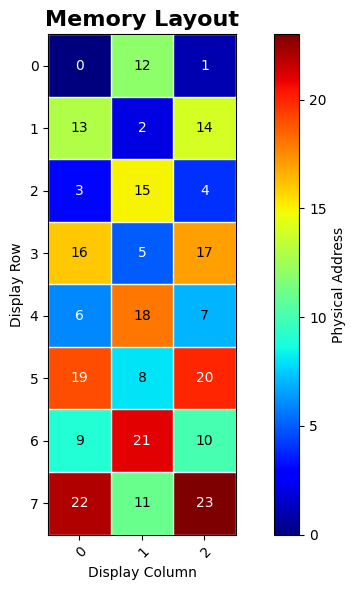

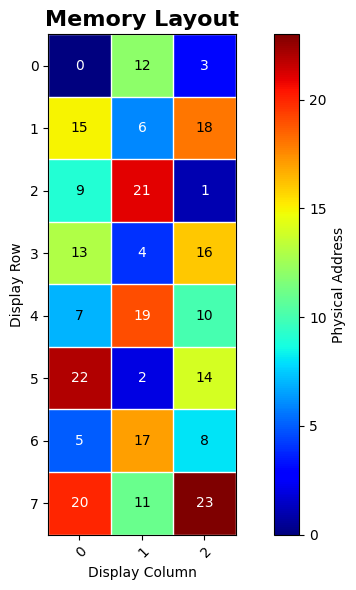

In [26]:
draws = {}
for p in perms: 
  draws[p] = Draw(fin_layouts[p],3)
  draws[p].show()

In [39]:
def construct_perm_graph(perms, fin_layouts): 
  Nodes = perms
  maps = {}
  for p in perms: 
    for q in perms: 
      A1 = fin_layouts[p]
      A2 = fin_layouts[q]
      composed_layout = A2[A1] 

      for h in perms: 
        if np.allclose(composed_layout, fin_layouts[h]): 
          maps[(p,q)] = h 
          break
      
  return maps 
  
  
  

In [40]:
maps = construct_perm_graph(perms, fin_layouts)

In [41]:
maps

{((0, 1, 2), (0, 1, 2)): (0, 1, 2),
 ((0, 1, 2), (0, 2, 1)): (0, 2, 1),
 ((0, 1, 2), (1, 0, 2)): (1, 0, 2),
 ((0, 1, 2), (1, 2, 0)): (1, 2, 0),
 ((0, 1, 2), (2, 0, 1)): (2, 0, 1),
 ((0, 1, 2), (2, 1, 0)): (2, 1, 0),
 ((0, 2, 1), (0, 1, 2)): (0, 2, 1),
 ((1, 0, 2), (0, 1, 2)): (1, 0, 2),
 ((1, 2, 0), (0, 1, 2)): (1, 2, 0),
 ((1, 2, 0), (0, 2, 1)): (2, 1, 0),
 ((2, 0, 1), (0, 1, 2)): (2, 0, 1),
 ((2, 0, 1), (1, 0, 2)): (2, 1, 0),
 ((2, 1, 0), (0, 1, 2)): (2, 1, 0)}

In [49]:
shape = (5,3,7)
stride = (2,17,31)
col_stride = (1,5,15) 

perm = (1,0,2)
x,y,z = perm 
shape_perm = (shape[x], shape[y], shape[z])
stride_perm = (stride[x], stride[y], stride[z])
col_stride_perm = (col_stride[x], col_stride[y], col_stride[z])

X = Layout(shape,stride)
X_col_perm = Layout(shape_perm, col_stride_perm) 
X_perm = Layout(shape_perm, stride_perm)

X.realize()
X_col_perm.realize()
X_perm.realize()

phi_L = X.realized_layout
phi_col_perm = X_col_perm.realized_layout
phi_L_perm = X_perm.realized_layout



In [50]:
print(phi_L_perm)

[  0  17  34   2  19  36   4  21  38   6  23  40   8  25  42  31  48  65
  33  50  67  35  52  69  37  54  71  39  56  73  62  79  96  64  81  98
  66  83 100  68  85 102  70  87 104  93 110 127  95 112 129  97 114 131
  99 116 133 101 118 135 124 141 158 126 143 160 128 145 162 130 147 164
 132 149 166 155 172 189 157 174 191 159 176 193 161 178 195 163 180 197
 186 203 220 188 205 222 190 207 224 192 209 226 194 211 228]


In [51]:
print(phi_L[phi_col_perm])

[  0  17  34   2  19  36   4  21  38   6  23  40   8  25  42  31  48  65
  33  50  67  35  52  69  37  54  71  39  56  73  62  79  96  64  81  98
  66  83 100  68  85 102  70  87 104  93 110 127  95 112 129  97 114 131
  99 116 133 101 118 135 124 141 158 126 143 160 128 145 162 130 147 164
 132 149 166 155 172 189 157 174 191 159 176 193 161 178 195 163 180 197
 186 203 220 188 205 222 190 207 224 192 209 226 194 211 228]


In [52]:
print(np.allclose(phi_L_perm, phi_L[phi_col_perm]))

True
